In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('updated_cd.xlsx')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,67,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Dearle,Male,33,1961-10-03,59,Senior Editor,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43,Senior Editor,IT,Affluent Customer,N,Yes,8.0


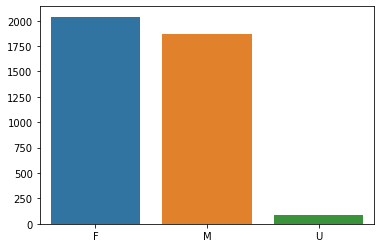

In [4]:
import seaborn as sns
f,m,u = 0,0,0
f = len(df[df['gender']=='Female'])
m = len(df[df['gender']=='Male'])
u = len(df[df['gender']=='Unknown'])
sns.barplot(y=[f,m,u], x=['F','M','U'])

In [6]:
f,m,u = 0,0,0
for i in df.index:
    if df['gender'].iloc[i] == 'Male':
        m+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['gender'].iloc[i] == 'Female':
        f+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['gender'].iloc[i] == 'Unknown':
        u+=df['past_3_years_bike_related_purchases'].iloc[i]
print(f,m,u)

98359 93483 3718


Text(0.5, 1.0, 'Old')

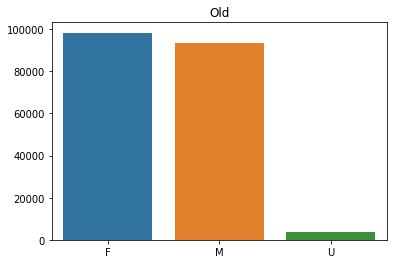

In [57]:
sns.barplot(y=[f,m,u], x=['F','M','U']).set_title('Old')

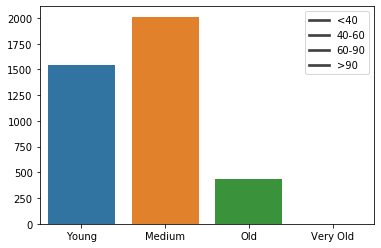

In [53]:
y = len(df[df['age']<=40.0])
m = len(df[(df['age']>40.0) & (df['age']<=60.0)])
o = len(df[(df['age']>60.0) & (df['age']<=90.0)])
vo = len(df[df['age']>90.0])
sns.barplot(y=[y,m,o,vo], x=['Young','Medium','Old','Very Old'])

In [58]:
y,m,o,vo = 0,0,0,0
for i in df.index:
    if df['age'].iloc[i] <=40.0:
        y+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['age'].iloc[i] > 40.0 and df['age'].iloc[i] <= 60.0:
        m+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['age'].iloc[i] >60.0 and df['age'].iloc[i] <= 90.0:
        o+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['age'].iloc[i] >90.0:
        vo+=df['past_3_years_bike_related_purchases'].iloc[i]
print(y,m,o,vo)

77155 97609 20737 59


Text(0.5, 1.0, 'Old')

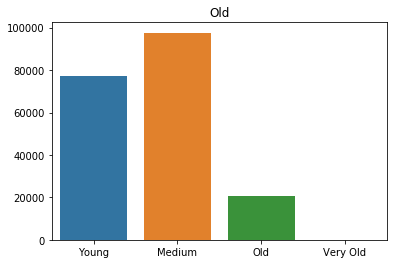

In [59]:
sns.barplot(y=[y,m,o,vo], x=['Young','Medium','Old','Very Old']).set_title('Old')

In [31]:
df2 = pd.read_csv('submission2.csv')
df2.insert(5,column='age',value=np.nan)
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,NaN,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,NaN,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,NaN,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,NaN,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,NaN,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [33]:
import datetime
for i in df2.index:
    if pd.isna(df2['DOB'].iloc[i-1]):
        continue
    elif type(df2['DOB'].iloc[i-1]) == str:
        df2['age'].iloc[i-1] = 2020 - int(df2['DOB'].iloc[i-1][:4])
    else:
        df2['age'].iloc[i-1] = 2020 - df2['DOB'].iloc[i-1].year
    if df2['age'].iloc[i-1] >= 100:
        print(df2.iloc[i-1])
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,63.0,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,50.0,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,46.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,41.0,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,55.0,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [34]:
df2['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [60]:
f,m,u = 0,0,0
for i in df2.index:
    if df2['gender'].iloc[i] == 'Male':
        m+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['gender'].iloc[i] == 'Female':
        f+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['gender'].iloc[i] == 'U':
        u+=df2['past_3_years_bike_related_purchases'].iloc[i]
print(f,m,u)

25212 23765 859


Text(0.5, 1.0, 'New')

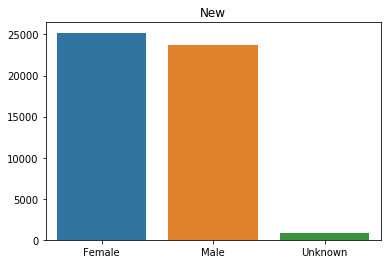

In [61]:
sns.barplot(y=[f,m,u], x=['Female','Male','Unknown']).set_title('New')

Text(0.5, 1.0, 'New')

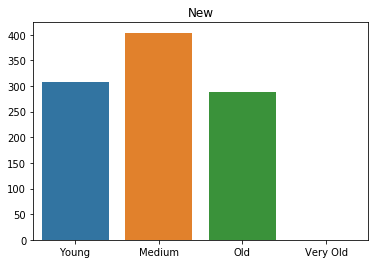

In [55]:
y = len(df2[df2['age']<=40.0])
m = len(df2[(df2['age']>40.0) & (df2['age']<=60.0)])
o = len(df2[(df2['age']>60.0) & (df2['age']<=90.0)])
vo = len(df2[df2['age']>90.0])
sns.barplot(y=[y,m,o,vo], x=['Young','Medium','Old','Very Old']).set_title('New')

In [62]:
y,m,o,vo = 0,0,0,0
for i in df2.index:
    if df2['age'].iloc[i] <40.0:
        y+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['age'].iloc[i] > 40.0 and df['age'].iloc[i] < 60.0:
        m+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['age'].iloc[i] >60.0 and df['age'].iloc[i] < 90.0:
        o+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['age'].iloc[i] >90.0:
        vo+=df2['past_3_years_bike_related_purchases'].iloc[i]
print(y,m,o,vo)

14590 30016 1820 0


Text(0.5, 1.0, 'New')

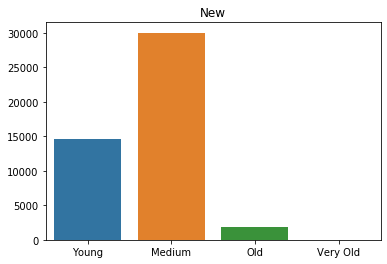

In [63]:
sns.barplot(y=[y,m,o,vo], x=['Young','Medium','Old','Very Old']).set_title('New')

In [88]:
a = list(df['job_industry_category'].unique())
c= []
for i in a:
    c.append(0)
for i in df.index:
    if df['job_industry_category'].iloc[i] == a[0]:
        c[0]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[1]:
        c[1]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[2]:
        c[2]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[3]:
        c[3]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[4]:
        c[4]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[5]:
        c[5]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[6]:
        c[6]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[7]:
        c[7]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['job_industry_category'].iloc[i] == a[8]:
        c[8]+=df['past_3_years_bike_related_purchases'].iloc[i]


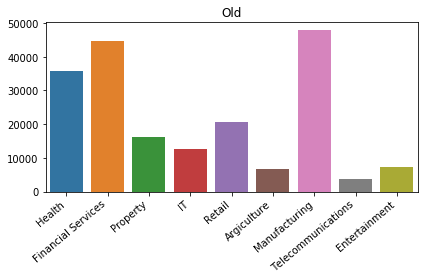

In [89]:
ax = sns.barplot(y=c,x=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Old')
plt.tight_layout()
plt.show()

In [90]:
a = list(df['job_industry_category'].unique())
c= []
for i in a:
    c.append(0)
for i in df2.index:
    if df2['job_industry_category'].iloc[i] == a[0]:
        c[0]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[1]:
        c[1]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[2]:
        c[2]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[3]:
        c[3]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[4]:
        c[4]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[5]:
        c[5]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[6]:
        c[6]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[7]:
        c[7]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['job_industry_category'].iloc[i] == a[8]:
        c[8]+=df2['past_3_years_bike_related_purchases'].iloc[i]


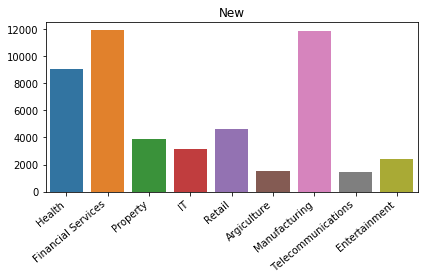

In [91]:
ax = sns.barplot(y=c,x=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('New')
plt.tight_layout()
plt.show()

In [82]:
a = list(df['wealth_segment'].unique())
a

['Mass Customer', 'Affluent Customer', 'High Net Worth']

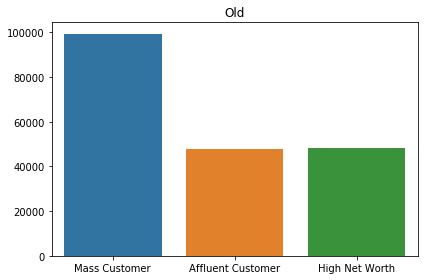

In [87]:
a = list(df['wealth_segment'].unique())
c= []
for i in a:
    c.append(0)
for i in df.index:
    if df['wealth_segment'].iloc[i] == a[0]:
        c[0]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['wealth_segment'].iloc[i] == a[1]:
        c[1]+=df['past_3_years_bike_related_purchases'].iloc[i]
    elif df['wealth_segment'].iloc[i] == a[2]:
        c[2]+=df['past_3_years_bike_related_purchases'].iloc[i]

ax = sns.barplot(y=c,x=a)
ax.set_title('Old')
plt.tight_layout()
plt.show()

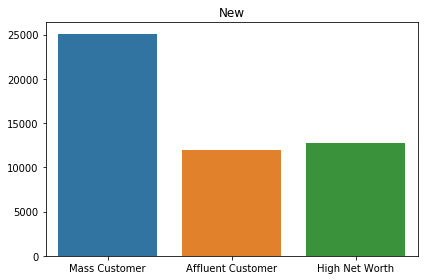

In [86]:
a = list(df['wealth_segment'].unique())
c= []
for i in a:
    c.append(0)
for i in df2.index:
    if df2['wealth_segment'].iloc[i] == a[0]:
        c[0]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['wealth_segment'].iloc[i] == a[1]:
        c[1]+=df2['past_3_years_bike_related_purchases'].iloc[i]
    elif df2['wealth_segment'].iloc[i] == a[2]:
        c[2]+=df2['past_3_years_bike_related_purchases'].iloc[i]

ax = sns.barplot(y=c,x=a)
ax.set_title('New')
plt.tight_layout()
plt.show()